# K-Means

In [1]:
#Importing necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading the dataset
df = pd.read_csv("milk.csv")

In [3]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [4]:
# Select relevant features for clustering
features = ['Colour', 'pH']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[features])

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


In [5]:
inertia

[2118.0000000000014,
 1190.5651111798788,
 814.0176095204055,
 374.18579415401535,
 314.88961410738534,
 244.78990797718993,
 154.49982825693772,
 91.30316881690788,
 65.97026061174843,
 54.71493569432704]

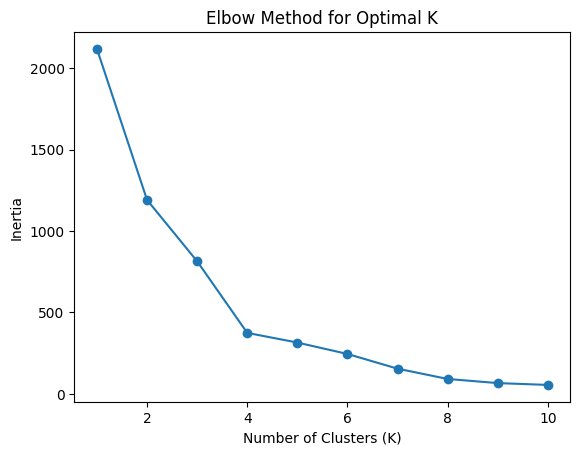

In [6]:
# Plot the Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [7]:
# Based on the Elbow method, choose an optimal value for K
optimal_k = 2  # Change this based on the plot

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Display the resulting clusters
print("Cluster Centers:")
# Create a DataFrame from the scaled features
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print(cluster_centers_df)


Cluster Centers:
       Colour        pH
0  246.564033  7.170845
1  254.638728  6.343353


In [8]:
# Select the features for clustering
X = df[['Colour', 'pH']]

# Initialize KMeans with the number of clusters you want
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['Cluster'] = labels

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Print the count of data points in each cluster
print("Count of data points in each cluster:")
print(df['Cluster'].value_counts())

Cluster Centers:
[[245.6763285    6.87536232]
 [254.91697417   6.99741697]
 [249.72781065   7.09467456]
 [240.           6.78125   ]
 [255.           3.5733945 ]]
Count of data points in each cluster:
Cluster
1    542
0    207
2    169
4    109
3     32
Name: count, dtype: int64


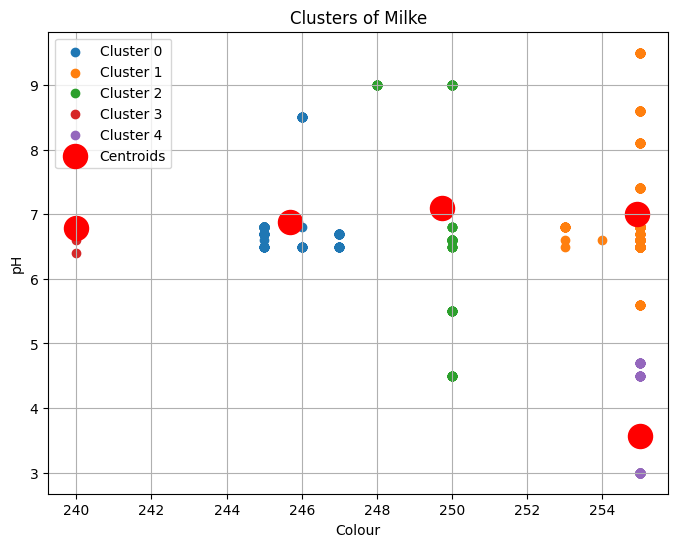

In [9]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Colour'], cluster_data['pH'], label=f'Cluster {i}')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

plt.title('Clusters of Milke')
plt.xlabel('Colour')
plt.ylabel('pH')
plt.legend()
plt.grid(True)
plt.show()


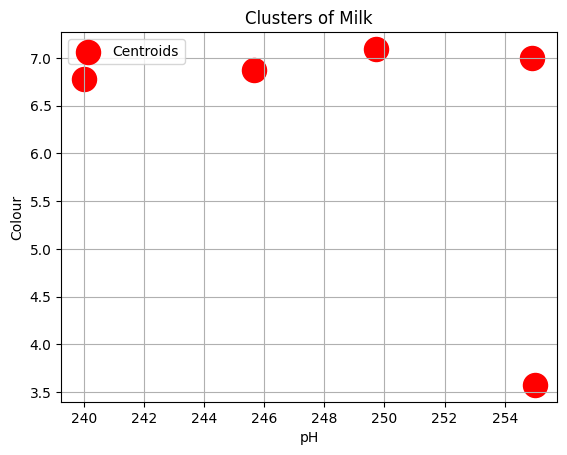

In [10]:
# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

plt.title('Clusters of Milk')
plt.xlabel('pH')
plt.ylabel('Colour')
plt.legend()
plt.grid(True)
plt.show()
